# Try Chainladder-Python Online
If you are here to try `chainladder-python` for the first time, you are in the right place!

With the help of Google Colab, you will be able to try the package online, without any installation or additional setup.

You should use a blank copy of this workbook.
  - Open in [Google Colab](https://githubtocolab.com/casact/chainladder-python/blob/master/docs/tutorials/demo-blank.ipynb) (faster, Google Account required)
  - Open in [Binder](https://mybinder.org/v2/gh/casact/chainladder-python/master?urlpath=tree/docs/tutorials/demo-blank.ipynb) (slower, no sign up required)

It's best that you work on your version of the workbook, while comparing this site directly for additional commentary and check your solutions to the exercises.

# Disclaimer
Note that a lot of the examples shown might not be applicable in a real world scenario, and is only meant to demonstrate some of the functionalities included in the package. The user should always follow all applicable laws, the Code of Professional Conduct, applicable Actuarial Standards of Practice, and exercise their best actuarial judgement.

# Setting Up
We will first need to install the package, as Google Colab's default environment doesn't have the chainladder package pre-installed. You will need to run this step using your terminal instead of using a python notebook when you are ready to install the package on your machine.

Simply execute `pip install chainladder`, Colab is smart enough to know that this is not a piece of python code, but to execute it in shell. FYI, `pip` stands for "Package Installer for Python".

In [1]:
pip install chainladder

Note: you may need to restart the kernel to use updated packages.


Other commonly used packages, such as `numpy`, `pandas`, and `matplotlib` are already pre-installed, we just need to load them into our environment.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import chainladder as cl

chainladder 0.8.13


Let's check the version of chainladder that we have.

In [39]:
print("chainladder", cl.__version__)

chainladder 0.8.13


# Your Journey Begins

Let's begin by looking at a sample dataset, called `xyz`, which is hosted on https://raw.githubusercontent.com/casact/chainladder-python/master/chainladder/utils/data/xyz.csv.

Let's load the dataset into the memory with `pandas`, then inspect it.

In [40]:
xyz_df = pd.read_csv(
    "https://raw.githubusercontent.com/casact/chainladder-python/master/chainladder/utils/data/xyz.csv"
)
xyz_df.head()

,AccidentYear,DevelopmentYear,Incurred,Paid,Reported,Closed,Premium
0,2002,2002,12811,2318,1342,203,61183
1,2003,2003,9651,1743,1373,181,69175
2,2004,2004,16995,2221,1932,235,99322
3,2005,2005,28674,3043,2067,295,138151
4,2006,2006,27066,3531,1473,307,107578


Can you list all of the unique accident years? How many are there?

In [41]:
xyz_df["AccidentYear"].unique()

array([2002, 2003, 2004, 2005, 2006, 2007, 2008, 1998, 1999, 2000, 2001])

In [5]:
xyz_df["AccidentYear"].nunique()

11

`````{warning} 
You are going to find many exercises throughout this workbook. You should try your best to not look at the solution until you have exhausted all your resources. Don't reveal the answer unless you have struggled for 10-15 minutes on each first. 

Here is the first one!
`````

`````{admonition} Exercise 1
:class: tip
How many unique valuation years are there? Can you sort them?
`````

```{admonition} Exercise 1 Solution
:class: dropdown
````python
xyz_df["DevelopmentYear"].unique()
np.sort(xyz_df["DevelopmentYear"].unique())
````

# Triangle Basics

chainladder comes with sample data already! Let's use `xyz`, and load the data into the chainladder triangle format. We'll call it `xyz_tri`.

In [42]:
xyz_tri = cl.load_sample("xyz")
xyz_tri

,Triangle Summary
Valuation:,2008-12
Grain:,OYDY
Shape:,"(1, 5, 11, 11)"
Index:,[Total]
Columns:,"[Incurred, Paid, Reported, Closed, Premium]"


What does the incurred triangle look like?

In [43]:
xyz_tri["Incurred"]

,12,24,36,48,60,72,84,96,108,120,132
1998,,,"11,171","12,380","13,216","14,067","14,688","16,366","16,163","15,835","15,822"
1999,,"13,255","16,405","19,639","22,473","23,764","25,094","24,795","25,071","25,107",
2000,"15,676","18,749","21,900","27,144","29,488","34,458","36,949","37,505","37,246",,
2001,"11,827","16,004","21,022","26,578","34,205","37,136","38,541","38,798",,,
2002,"12,811","20,370","26,656","37,667","44,414","48,701","48,169",,,,
2003,"9,651","16,995","30,354","40,594","44,231","44,373",,,,,
2004,"16,995","40,180","58,866","71,707","70,288",,,,,,
2005,"28,674","47,432","70,340","70,655",,,,,,,
2006,"27,066","46,783","48,804",,,,,,,,
2007,"19,477","31,732",,,,,,,,,


How about paid?

In [44]:
xyz_tri["Paid"]

,12,24,36,48,60,72,84,96,108,120,132
1998,,,"6,309","8,521","10,082","11,620","13,242","14,419","15,311","15,764","15,822"
1999,,"4,666","9,861","13,971","18,127","22,032","23,511","24,146","24,592","24,817",
2000,"1,302","6,513","12,139","17,828","24,030","28,853","33,222","35,902","36,782",,
2001,"1,539","5,952","12,319","18,609","24,387","31,090","37,070","38,519",,,
2002,"2,318","7,932","13,822","22,095","31,945","40,629","44,437",,,,
2003,"1,743","6,240","12,683","22,892","34,505","39,320",,,,,
2004,"2,221","9,898","25,950","43,439","52,811",,,,,,
2005,"3,043","12,219","27,073","40,026",,,,,,,
2006,"3,531","11,778","22,819",,,,,,,,
2007,"3,529","11,865",,,,,,,,,


`````{admonition} Exercise 2
:class: tip
What would the Reported triangle look like?
`````

```{admonition} Exercise 2 Solution
:class: dropdown
````python
xyz_tri["Reported"]
````

`````{admonition} Exercise 3
:class: tip
What would the Open Claim Count triangle look like?
`````

```{admonition} Exercise 3 Solution
:class: dropdown
````python
xyz_tri["Reported"] - xyz_tri["Closed"]
````

# Pandas-like Operations

Let's see how `.iloc[...]` and `.loc[...]` similarly to pandas. They take 4 parameters: [index, column, origin, valuation].

What if we want the row from AY 1998 Incurred data?

In [46]:
xyz_tri.iloc[:, 0, 0, :]

,12,24,36,48,60,72,84,96,108,120,132
1998,,,"11,171","12,380","13,216","14,067","14,688","16,366","16,163","15,835","15,822"


What if you only want the valuation at age 60?

In [10]:
xyz_tri.iloc[:, 0, 0, 4]

,60
1998,"13,216"


`````{admonition} Exercise 4
:class: tip
How do we get the Incurred column at age 60?
`````

```{admonition} Exercise 4 Solution
:class: dropdown
````python
xyz_tri.iloc[:, 0, :, 4]
````

`````{admonition} Exercise 5
:class: tip
How do we get the Incurred column at age 60, but discarding everything below origin 2005? Display the result in thousands.
`````

```{admonition} Exercise 5 Solution
:class: dropdown
````python
xyz_tri.iloc[:, 0, 0:7, 4] / 1000
````

`````{admonition} Exercise 6
:class: tip
How do we get the Paid loss ratios for all origins, but only the latest 5 columns?
`````

```{admonition} Exercise 6 Solution
:class: dropdown
````python
xyz_tri.iloc[:, 1, :, -5:] / xyz_tri.iloc[:, 4, :, -5:]
````

Let's use `.loc[...]` to get the incurred triangle.

In [11]:
xyz_tri.loc[:, "Incurred", :, :]

,12,24,36,48,60,72,84,96,108,120,132
1998,,,"11,171","12,380","13,216","14,067","14,688","16,366","16,163","15,835","15,822"
1999,,"13,255","16,405","19,639","22,473","23,764","25,094","24,795","25,071","25,107",
2000,"15,676","18,749","21,900","27,144","29,488","34,458","36,949","37,505","37,246",,
2001,"11,827","16,004","21,022","26,578","34,205","37,136","38,541","38,798",,,
2002,"12,811","20,370","26,656","37,667","44,414","48,701","48,169",,,,
2003,"9,651","16,995","30,354","40,594","44,231","44,373",,,,,
2004,"16,995","40,180","58,866","71,707","70,288",,,,,,
2005,"28,674","47,432","70,340","70,655",,,,,,,
2006,"27,066","46,783","48,804",,,,,,,,
2007,"19,477","31,732",,,,,,,,,


`````{admonition} Exercise 7
:class: tip
What if we want the Paid value for AY 1999 at age 60?
`````

```{admonition} Exercise 7 Solution
:class: dropdown
````python
xyz_tri.loc[:, "Paid", "1999", 60]
````

How do we get the latest incurred diagonal only?

In [12]:
xyz_tri["Incurred"].latest_diagonal

,2008
1998,"15,822"
1999,"25,107"
2000,"37,246"
2001,"38,798"
2002,"48,169"
2003,"44,373"
2004,"70,288"
2005,"70,655"
2006,"48,804"
2007,"31,732"


Very often, we want incremental triangles instead. Let's convert the Incurred triangle to the incremental form.

In [13]:
xyz_tri["Incurred"].cum_to_incr()

,12,24,36,48,60,72,84,96,108,120,132
1998,,,"11,171","1,209",836,851,621,"1,678",-203,-328,-13
1999,,"13,255","3,150","3,234","2,834","1,291","1,330",-299,276,36,
2000,"15,676","3,073","3,151","5,244","2,344","4,970","2,491",556,-259,,
2001,"11,827","4,177","5,018","5,556","7,627","2,931","1,405",257,,,
2002,"12,811","7,559","6,286","11,011","6,747","4,287",-532,,,,
2003,"9,651","7,344","13,359","10,240","3,637",142,,,,,
2004,"16,995","23,185","18,686","12,841","-1,419",,,,,,
2005,"28,674","18,758","22,908",315,,,,,,,
2006,"27,066","19,717","2,021",,,,,,,,
2007,"19,477","12,255",,,,,,,,,


`````{admonition} Exercise 8
:class: tip
Can you cast the raw Incurred triangle to the incremental form, and the back to the cumulative form, and check if it mutated?
`````

```{admonition} Exercise 8 Solution
:class: dropdown
````python
xyz_tri["Incurred"].cum_to_incr().incr_to_cum() == xyz_tri["Incurred"]
````

`````{admonition} Exercise 9
:class: tip
If we assume that the ultimate claim count is 0.25 times current Open claim count, plus the current Reported claim count, what would the ultimate claim count by origin years look like?
`````

```{admonition} Exercise 9 Solution
:class: dropdown
````python
(xyz_tri["Reported"] - xyz_tri["Closed"]).latest_diagonal * 0.25 + xyz_tri["Reported"].latest_diagonal
````

We can also convert the triangle to the valuation format, what we often see on Schedule Ps.

In [14]:
xyz_tri["Incurred"].dev_to_val()

,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
1998,,,"11,171","12,380","13,216","14,067","14,688","16,366","16,163","15,835","15,822"
1999,,,"13,255","16,405","19,639","22,473","23,764","25,094","24,795","25,071","25,107"
2000,,,"15,676","18,749","21,900","27,144","29,488","34,458","36,949","37,505","37,246"
2001,,,,"11,827","16,004","21,022","26,578","34,205","37,136","38,541","38,798"
2002,,,,,"12,811","20,370","26,656","37,667","44,414","48,701","48,169"
2003,,,,,,"9,651","16,995","30,354","40,594","44,231","44,373"
2004,,,,,,,"16,995","40,180","58,866","71,707","70,288"
2005,,,,,,,,"28,674","47,432","70,340","70,655"
2006,,,,,,,,,"27,066","46,783","48,804"
2007,,,,,,,,,,"19,477","31,732"


`````{admonition} Exercise 10
:class: tip
Can you get the Incurred column for 2005 valuation?
`````

```{admonition} Exercise 10 Solution
:class: dropdown
````python
xyz_tri["Incurred"].dev_to_val().loc[:, :, :, "2005"]
````

`````{admonition} Exercise 11
:class: tip
Can you get the Incurred columns for 2005 through 2008?
`````

```{admonition} Exercise 11 Solution
:class: dropdown
````python
xyz_tri["Incurred"].dev_to_val().iloc[:, :, :, 7:]
````

Another function that is often useful is the `.heatmap()` method. Let's inspect the incurred amount and see if there are trends.

In [15]:
xyz_tri["Incurred"].heatmap()

,12,24,36,48,60,72,84,96,108,120,132
1998,,,"11,171","12,380","13,216","14,067","14,688","16,366","16,163","15,835","15,822"
1999,,"13,255","16,405","19,639","22,473","23,764","25,094","24,795","25,071","25,107",
2000,"15,676","18,749","21,900","27,144","29,488","34,458","36,949","37,505","37,246",,
2001,"11,827","16,004","21,022","26,578","34,205","37,136","38,541","38,798",,,
2002,"12,811","20,370","26,656","37,667","44,414","48,701","48,169",,,,
2003,"9,651","16,995","30,354","40,594","44,231","44,373",,,,,
2004,"16,995","40,180","58,866","71,707","70,288",,,,,,
2005,"28,674","47,432","70,340","70,655",,,,,,,
2006,"27,066","46,783","48,804",,,,,,,,
2007,"19,477","31,732",,,,,,,,,


# Development

How can we get the incurred link ratios?

In [16]:
xyz_tri["Incurred"].link_ratio

,12-24,24-36,36-48,48-60,60-72,72-84,84-96,96-108,108-120,120-132
1998,,,1.1082,1.0675,1.0644,1.0441,1.1142,0.9876,0.9797,0.9992
1999,,1.2376,1.1971,1.1443,1.0574,1.0560,0.9881,1.0111,1.0014,
2000,1.1960,1.1681,1.2395,1.0864,1.1685,1.0723,1.0150,0.9931,,
2001,1.3532,1.3135,1.2643,1.2870,1.0857,1.0378,1.0067,,,
2002,1.5900,1.3086,1.4131,1.1791,1.0965,0.9891,,,,
2003,1.7610,1.7861,1.3374,1.0896,1.0032,,,,,
2004,2.3642,1.4651,1.2181,0.9802,,,,,,
2005,1.6542,1.4830,1.0045,,,,,,,
2006,1.7285,1.0432,,,,,,,,
2007,1.6292,,,,,,,,,


We can also apply a `.heatmap()` to make it too, to help us visulize the highs and lows.

In [17]:
xyz_tri["Incurred"].link_ratio.heatmap()

,12-24,24-36,36-48,48-60,60-72,72-84,84-96,96-108,108-120,120-132
1998,,,1.1082,1.0675,1.0644,1.0441,1.1142,0.9876,0.9797,0.9992
1999,,1.2376,1.1971,1.1443,1.0574,1.0560,0.9881,1.0111,1.0014,
2000,1.1960,1.1681,1.2395,1.0864,1.1685,1.0723,1.0150,0.9931,,
2001,1.3532,1.3135,1.2643,1.2870,1.0857,1.0378,1.0067,,,
2002,1.5900,1.3086,1.4131,1.1791,1.0965,0.9891,,,,
2003,1.7610,1.7861,1.3374,1.0896,1.0032,,,,,
2004,2.3642,1.4651,1.2181,0.9802,,,,,,
2005,1.6542,1.4830,1.0045,,,,,,,
2006,1.7285,1.0432,,,,,,,,
2007,1.6292,,,,,,,,,


Let's get a volume-weighted average LDFs for our Incurred triangle.

In [18]:
cl.Development().fit(xyz_tri["Incurred"]).ldf_

,12-24,24-36,36-48,48-60,60-72,72-84,84-96,96-108,108-120,120-132
(All),1.6757,1.3394,1.1934,1.0959,1.0770,1.0336,1.0190,0.9976,0.9929,0.9992


How about the CDFs?

In [19]:
cl.Development().fit(xyz_tri["Incurred"]).cdf_

,12-Ult,24-Ult,36-Ult,48-Ult,60-Ult,72-Ult,84-Ult,96-Ult,108-Ult,120-Ult
(All),3.2955,1.9666,1.4684,1.2304,1.1227,1.0425,1.0086,0.9898,0.9921,0.9992


`````{admonition} Exercise 12
:class: tip
Can you get the Incurred LDF but using `simple`-weighted average using all periods?
`````

```{admonition} Exercise 12 Solution
:class: dropdown
````python
cl.Development(average="simple").fit(xyz_tri["Incurred"]).ldf_
````

We can also use only the latest 3 periods in the calculation of LDFs.

In [20]:
cl.Development(n_periods=3).fit(xyz_tri["Incurred"]).ldf_

,12-24,24-36,36-48,48-60,60-72,72-84,84-96,96-108,108-120,120-132
(All),1.6744,1.3245,1.1466,1.0598,1.0599,1.0280,1.0051,0.9976,0.9929,0.9992


`````{admonition} Exercise 13
:class: tip
How do we get the Incurred LDF using simple-weighted average but with only the latest 3 periods?
`````

```{admonition} Exercise 13 Solution
:class: dropdown
````python
cl.Development(average="simple", n_periods=3).fit(xyz_tri["Incurred"]).ldf_
````

`````{admonition} Exercise 14
:class: tip
Try to cast the `ldf_` to cumlative factors and back to incremental factors, did it mutate?
`````

```{admonition} Exercise 14 Solution
:class: dropdown
````python
cl.Development(average="simple", n_periods=3).fit(
    xyz_tri["Incurred"]
).ldf_.incr_to_cum().cum_to_incr() == cl.Development(average="simple", n_periods=3).fit(
    xyz_tri["Incurred"]
).ldf_
````

`````{admonition} Exercise 15
:class: tip
Use the [reference doc](https://chainladder-python.readthedocs.io/en/latest/modules/generated/chainladder.Development.html), see if you can figure out how to calculate the LDFs using volume-weighted average of all values, but discarding the highest and the lowest values. Did you get a warning? Make sure you understand what it means.
`````

```{admonition} Exercise 15 Solution
:class: dropdown
````python
cl.Development(average="volume", drop_high=True, drop_low=True).fit(xyz_tri["Incurred"]).ldf_
````

# Deterministic Models

Before we can build any models, we need to use `fit_transform()`, so that the object is actually modified with our selected development pattern(s).

Set the development of the triangle to use only 3 periods.

In [21]:
cl.Development(n_periods=3).fit_transform(xyz_tri["Incurred"])

,12,24,36,48,60,72,84,96,108,120,132
1998,,,"11,171","12,380","13,216","14,067","14,688","16,366","16,163","15,835","15,822"
1999,,"13,255","16,405","19,639","22,473","23,764","25,094","24,795","25,071","25,107",
2000,"15,676","18,749","21,900","27,144","29,488","34,458","36,949","37,505","37,246",,
2001,"11,827","16,004","21,022","26,578","34,205","37,136","38,541","38,798",,,
2002,"12,811","20,370","26,656","37,667","44,414","48,701","48,169",,,,
2003,"9,651","16,995","30,354","40,594","44,231","44,373",,,,,
2004,"16,995","40,180","58,866","71,707","70,288",,,,,,
2005,"28,674","47,432","70,340","70,655",,,,,,,
2006,"27,066","46,783","48,804",,,,,,,,
2007,"19,477","31,732",,,,,,,,,


Let's fit a chainladder model to our Incurred triangle.

In [22]:
cl_mod = cl.Chainladder().fit(xyz_tri["Incurred"])
cl_mod

Chainladder()

How can we get the model's ultimate estimate?

In [23]:
cl_mod.ultimate_

,2261
1998,"15,822"
1999,"25,086"
2000,"36,952"
2001,"38,401"
2002,"48,582"
2003,"46,258"
2004,"78,914"
2005,"86,933"
2006,"71,662"
2007,"62,406"


How about just the IBNR?

In [24]:
cl_mod.ibnr_

,2261
1998,
1999,-21
2000,-294
2001,-397
2002,413
2003,"1,885"
2004,"8,626"
2005,"16,278"
2006,"22,858"
2007,"30,674"


`````{admonition} Exercise 16
:class: tip
Can you get the IBNR without using the `.ibnr_` attribute? Check it against `.ibnr_`.
`````

```{admonition} Exercise 16 Solution
:class: dropdown
````python
cl_mod.ultimate_ - xyz_tri["Incurred"].latest_diagonal == cl_mod.ibnr_
````

`````{admonition} Exercise 17
:class: tip
Fit the chainladder model to the paid triangle, what is the ultimate for origin year 2005?
`````

```{admonition} Exercise 17 Solution
:class: dropdown
````python
cl.Chainladder().fit(xyz_tri["Paid"]).ultimate_.loc[:, :, "2005", :]
````

Let's fit an Expected Loss model, with an aprior of 90% on Premium, and get its ultimates.

In [25]:
cl.ExpectedLoss(apriori=0.90).fit(
    xyz_tri["Incurred"], sample_weight=xyz_tri["Premium"].latest_diagonal
).ultimate_

,2261
1998,"18,000"
1999,"28,350"
2000,"40,500"
2001,"45,000"
2002,"55,065"
2003,"62,258"
2004,"89,390"
2005,"124,336"
2006,"96,820"
2007,"56,194"


Try it on the Paid triangle, do you get the same ultimate?

In [26]:
cl.ExpectedLoss(apriori=0.90).fit(
    xyz_tri["Paid"], sample_weight=xyz_tri["Premium"].latest_diagonal
).ultimate_

,2261
1998,"18,000"
1999,"28,350"
2000,"40,500"
2001,"45,000"
2002,"55,065"
2003,"62,258"
2004,"89,390"
2005,"124,336"
2006,"96,820"
2007,"56,194"


`````{admonition} Exercise 18
:class: tip
What would the ultimate amounts be if we assume that they are 50% of premium + $20,000?
`````

```{admonition} Exercise 18 Solution
:class: dropdown
````python
cl.ExpectedLoss(apriori=1.00).fit(
    xyz_tri["Incurred"], sample_weight=xyz_tri["Premium"].latest_diagonal * 0.50 + 20000
).ultimate_
````

How about a Bornhuetter-Ferguson model?

In [27]:
cl.BornhuetterFerguson(apriori=0.90).fit(
    xyz_tri["Incurred"], sample_weight=xyz_tri["Premium"].latest_diagonal
).ultimate_

,2261
1998,"15,822"
1999,"25,084"
2000,"36,924"
2001,"38,332"
2002,"48,637"
2003,"46,910"
2004,"80,059"
2005,"93,937"
2006,"79,686"
2007,"59,353"


How about Benktander, with 2 iterations?

In [28]:
cl.Benktander(apriori=0.90, n_iters=2).fit(
    xyz_tri["Incurred"], sample_weight=xyz_tri["Premium"].latest_diagonal
).ultimate_

,2261
1998,"15,822"
1999,"25,086"
2000,"36,952"
2001,"38,401"
2002,"48,583"
2003,"46,285"
2004,"79,039"
2005,"88,245"
2006,"74,221"
2007,"60,905"


`````{admonition} Exercise 19
:class: tip
Do you remember how many iterations of the Benktander method yields the same result as a BF model? Try to see if they reconcile.
`````

```{admonition} Exercise 19 Solution
:class: dropdown
````python
cl.Benktander(apriori=0.90, n_iters=1).fit(
    xyz_tri["Incurred"], sample_weight=xyz_tri["Premium"].latest_diagonal
).ultimate_ == cl.BornhuetterFerguson(apriori=0.90).fit(
    xyz_tri["Incurred"], sample_weight=xyz_tri["Premium"].latest_diagonal
).ultimate_
````

How about Cape Cod?

In [29]:
cl.CapeCod().fit(
    xyz_tri["Incurred"], sample_weight=xyz_tri["Premium"].latest_diagonal
).ultimate_

,2261
1998,"15,822"
1999,"25,087"
2000,"36,975"
2001,"38,407"
2002,"48,562"
2003,"46,504"
2004,"78,496"
2005,"90,214"
2006,"74,748"
2007,"54,936"


Let's store the Cape Cod model as `cc_result`. We can also use `.to_frame()` to leave `chainladder` and go to a `DataFrame`. Let's make a bar chart over origin years to see what they look like.

/Users/kennethhsu/opt/anaconda3/lib/python3.9/site-packages/chainladder/core/pandas.py:62: UserWarning: In an upcoming version of the package, `origin_as_datetime` will be defaulted to `True` in to_frame(...), use `origin_as_datetime=False` to preserve current setting.
  warnings.warn(warning)
/Users/kennethhsu/opt/anaconda3/lib/python3.9/site-packages/chainladder/core/pandas.py:62: UserWarning: In an upcoming version of the package, `origin_as_datetime` will be defaulted to `True` in to_frame(...), use `origin_as_datetime=False` to preserve current setting.
  warnings.warn(warning)


<BarContainer object of 11 artists>

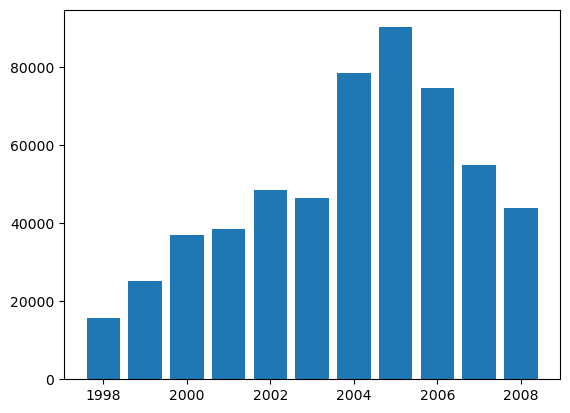

In [30]:
cc_result = cl.CapeCod().fit(
    xyz_tri["Incurred"], sample_weight=xyz_tri["Premium"].latest_diagonal
)

plt.bar(
    cc_result.ultimate_.to_frame().index.year,
    cc_result.ultimate_.to_frame()["2261"],
)

`````{admonition} Exercise 20
:class: tip
With so many models built, can you plot their ultimates on a line chart, and compare their estimates? Start with the following code:
```python
cl_result = cl.Chainladder().fit(xyz_tri["Incurred"])
el_result = cl.ExpectedLoss(apriori=0.90).fit(xyz_tri["Incurred"], sample_weight=xyz_tri["Premium"].latest_diagonal)
bf_result = cl.BornhuetterFerguson(apriori=0.90).fit(xyz_tri["Incurred"], sample_weight=xyz_tri["Premium"].latest_diagonal)
bk_result = cl.Benktander(apriori=0.90, n_iters=1).fit(xyz_tri["Incurred"], sample_weight=xyz_tri["Premium"].latest_diagonal)
cc_result = cl.CapeCod().fit(xyz_tri["Incurred"], sample_weight=xyz_tri["Premium"].latest_diagonal)
```
`````

```{admonition} Exercise 20 Solution
:class: dropdown
````python
plt.plot(
    cl_result.ultimate_.to_frame().index.year,
    cl_result.ultimate_.to_frame()["2261"],
    label="Chainladder",
)
plt.plot(
    el_result.ultimate_.to_frame().index.year,
    el_result.ultimate_.to_frame()["2261"],
    label="Expected Loss",
)
plt.plot(
    bf_result.ultimate_.to_frame().index.year,
    bf_result.ultimate_.to_frame()["2261"],
    label="Bornhuetter-Ferguson",
)
plt.plot(
    bk_result.ultimate_.to_frame().index.year,
    bk_result.ultimate_.to_frame()["2261"],
    label="Benktander",
)
plt.plot(
    cc_result.ultimate_.to_frame().index.year,
    cc_result.ultimate_.to_frame()["2261"],
    label="Cape Cod",
)

plt.legend(loc="upper left")
````

# Stochastic Models

The Mack's Chainladder model is available.

In [31]:
mcl_mod = cl.MackChainladder().fit(xyz_tri["Incurred"])
mcl_mod

MackChainladder()

There are many attributes that are available, such as `full_std_err_`, `total_process_risk_`, `total_parameter_risk_`, `mack_std_err_` and `total_mack_std_err_`.

In [32]:
mcl_mod.full_std_err_

,12,24,36,48,60,72,84,96,108,120,132
1998,0.0000,0.0000,0.2450,0.1741,0.0886,0.0537,0.0609,0.0146,0.0169,0.0110,0.0000
1999,0.0000,0.3044,0.2022,0.1382,0.0679,0.0413,0.0466,0.0118,0.0136,0.0087,0.0000
2000,0.3243,0.2559,0.1750,0.1176,0.0593,0.0343,0.0384,0.0096,0.0112,0.0072,0.0000
2001,0.3734,0.2770,0.1786,0.1188,0.0550,0.0330,0.0376,0.0095,0.0109,0.0070,0.0000
2002,0.3587,0.2455,0.1586,0.0998,0.0483,0.0289,0.0337,0.0084,0.0097,0.0063,0.0000
2003,0.4133,0.2688,0.1487,0.0961,0.0484,0.0302,0.0345,0.0086,0.0100,0.0064,0.0000
2004,0.3115,0.1748,0.1067,0.0723,0.0384,0.0231,0.0264,0.0066,0.0076,0.0049,0.0000
2005,0.2398,0.1609,0.0977,0.0729,0.0366,0.0221,0.0252,0.0063,0.0073,0.0047,0.0000
2006,0.2468,0.1620,0.1172,0.0803,0.0403,0.0243,0.0277,0.0069,0.0080,0.0052,0.0000
2007,0.2909,0.1967,0.1256,0.0860,0.0432,0.0260,0.0297,0.0074,0.0086,0.0055,0.0000


MackChainladder also has a `summary_` attribute.

In [33]:
mcl_mod.summary_

,Latest,IBNR,Ultimate,Mack Std Err
1998,"15,822",,"15,822",
1999,"25,107",-21,"25,086",352
2000,"37,246",-294,"36,952",751
2001,"38,798",-397,"38,401",893
2002,"48,169",413,"48,582","2,190"
2003,"44,373","1,885","46,258","2,614"
2004,"70,288","8,626","78,914","5,004"
2005,"70,655","16,278","86,933","8,487"
2006,"48,804","22,858","71,662","10,738"
2007,"31,732","30,674","62,406","13,925"


Let's make a graph, that shows the Reported and IBNR as stacked bars, and error bars showing Mack Standard Errors.

/Users/kennethhsu/opt/anaconda3/lib/python3.9/site-packages/chainladder/core/pandas.py:62: UserWarning: In an upcoming version of the package, `origin_as_datetime` will be defaulted to `True` in to_frame(...), use `origin_as_datetime=False` to preserve current setting.
  warnings.warn(warning)
/Users/kennethhsu/opt/anaconda3/lib/python3.9/site-packages/chainladder/core/pandas.py:62: UserWarning: In an upcoming version of the package, `origin_as_datetime` will be defaulted to `True` in to_frame(...), use `origin_as_datetime=False` to preserve current setting.
  warnings.warn(warning)
/Users/kennethhsu/opt/anaconda3/lib/python3.9/site-packages/chainladder/core/pandas.py:62: UserWarning: In an upcoming version of the package, `origin_as_datetime` will be defaulted to `True` in to_frame(...), use `origin_as_datetime=False` to preserve current setting.
  warnings.warn(warning)
/Users/kennethhsu/opt/anaconda3/lib/python3.9/site-packages/chainladder/core/pandas.py:62: UserWarning: In an upcom

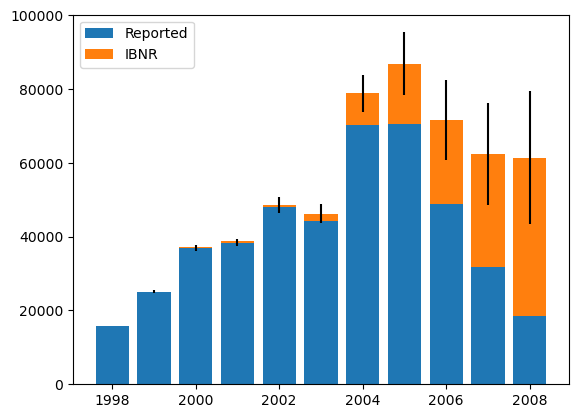

In [34]:
plt.bar(
    mcl_mod.summary_.to_frame().index.year,
    mcl_mod.summary_.to_frame()["Latest"],
    label="Reported",
)
plt.bar(
    mcl_mod.summary_.to_frame().index.year,
    mcl_mod.summary_.to_frame()["IBNR"],
    bottom=mcl_mod.summary_.to_frame()["Latest"],
    yerr=mcl_mod.summary_.to_frame()["Mack Std Err"],
    label="IBNR",
)
plt.legend(loc="upper left")

ODP Bootstrap is also available. Let's build sample 10,000 Incurred triangles.

In [35]:
xyz_tri_sampled = (
    cl.BootstrapODPSample(n_sims=10000).fit(xyz_tri["Incurred"]).resampled_triangles_
)
xyz_tri_sampled

,Triangle Summary
Valuation:,2008-12
Grain:,OYDY
Shape:,"(10000, 1, 11, 11)"
Index:,[Total]
Columns:,[Incurred]


We can fit a basic chainladder to all sampled triangles. We now have 10,000 simulated chainladder models, all (most) with unique LDFs.

In [36]:
cl_mod_bootstrapped = cl.Chainladder().fit(xyz_tri_sampled)
cl_mod_bootstrapped

/Users/kennethhsu/opt/anaconda3/lib/python3.9/site-packages/chainladder/utils/weighted_regression.py:76: RuntimeWarning: invalid value encountered in sqrt
  residual = (y - fitted_value) * xp.sqrt(w)
/Users/kennethhsu/opt/anaconda3/lib/python3.9/site-packages/chainladder/utils/weighted_regression.py:81: RuntimeWarning: invalid value encountered in sqrt
  std_err = xp.sqrt(mse / d)
/Users/kennethhsu/opt/anaconda3/lib/python3.9/site-packages/chainladder/development/development.py:182: RuntimeWarning: invalid value encountered in sqrt
  / xp.swapaxes(xp.sqrt(x ** (2 - exponent))[..., 0:1, :], -1, -2)
/Users/kennethhsu/opt/anaconda3/lib/python3.9/site-packages/chainladder/development/development.py:192: RuntimeWarning: invalid value encountered in sqrt
  std = xp.sqrt((1 / num_to_nan(w)) * (self.sigma_ ** 2).values)
/Users/kennethhsu/opt/anaconda3/lib/python3.9/site-packages/chainladder/tails/base.py:120: RuntimeWarning: overflow encountered in exp
  sigma_ = xp.exp(time_pd * reg.slope_ + 

Chainladder()

We can use `predict()` to use the model characteristics (their unique LDFs) to predict our basic Incurred triangle.

In [37]:
cl_mod_bootstrapped.predict(xyz_tri["Incurred"]).ultimate_.std()

,2261
1998,
1999,"4,995"
2000,"7,197"
2001,"7,492"
2002,"9,633"
2003,"9,233"
2004,"15,981"
2005,"18,207"
2006,"14,766"
2007,"13,147"


Let's make another graph.

/Users/kennethhsu/opt/anaconda3/lib/python3.9/site-packages/chainladder/core/pandas.py:62: UserWarning: In an upcoming version of the package, `origin_as_datetime` will be defaulted to `True` in to_frame(...), use `origin_as_datetime=False` to preserve current setting.
  warnings.warn(warning)
/Users/kennethhsu/opt/anaconda3/lib/python3.9/site-packages/chainladder/core/pandas.py:62: UserWarning: In an upcoming version of the package, `origin_as_datetime` will be defaulted to `True` in to_frame(...), use `origin_as_datetime=False` to preserve current setting.
  warnings.warn(warning)
/Users/kennethhsu/opt/anaconda3/lib/python3.9/site-packages/chainladder/core/pandas.py:62: UserWarning: In an upcoming version of the package, `origin_as_datetime` will be defaulted to `True` in to_frame(...), use `origin_as_datetime=False` to preserve current setting.
  warnings.warn(warning)


<BarContainer object of 11 artists>

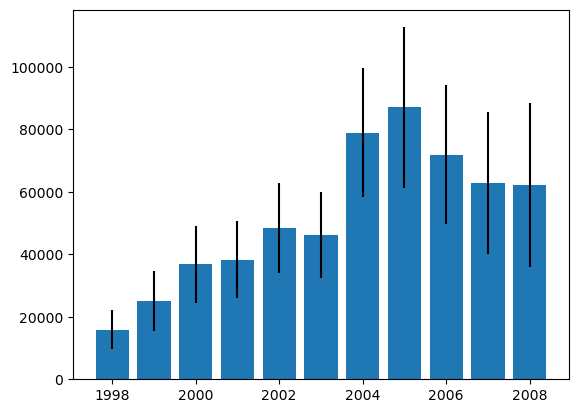

In [38]:
plt.bar(
    cl_mod_bootstrapped.ultimate_.mean().to_frame().index.year,
    cl_mod_bootstrapped.ultimate_.mean().to_frame()["2261"],
    yerr=cl_mod_bootstrapped.ultimate_.std().to_frame()["2261"],
)